In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline


In [2]:
df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
# df = pd.read_excel("Topics_keywords.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach..."
1,996icu/996.ICU,[]
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha..."
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'..."
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']"
5,facebook/react,"['react', 'javascript', 'library', 'ui', 'fron..."
6,kamranahmedse/developer-roadmap,"['computer-science', 'engineering', 'roadmap',..."
7,sindresorhus/awesome,"['lists', 'awesome', 'unicorns', 'resources', ..."
8,tensorflow/tensorflow,"['python', 'machine-learning', 'deep-neural-ne..."
9,public-apis/public-apis,"['api', 'list', 'development', 'public', 'reso..."


In [3]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [4]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


[('javascript', 184),
 ('react', 121),
 ('web', 120),
 ('python', 101),
 ('awesome', 83),
 ('hacktoberfest', 78),
 ('nodejs', 71),
 ('vue', 68),
 ('data', 66),
 ('interview', 63),
 ('spring', 61),
 ('sql', 55),
 ('machinelearning', 53),
 ('css', 52),
 ('android', 51),
 ('test', 49),
 ('api', 47),
 ('java', 47),
 ('go', 47),
 ('deep-learning', 45),
 ('html', 45),
 ('docker', 41),
 ('swift', 40),
 ('algorithm', 38),
 ('ui', 38),
 ('material', 36),
 ('typescript', 36),
 ('programming', 35),
 ('system', 35),
 ('ios', 34),
 ('terminal', 33),
 ('macos', 33),
 ('server', 33),
 ('windows', 31),
 ('git', 31),
 ('linux', 30),
 ('json', 30),
 ('http', 29),
 ('framework', 28),
 ('php', 28),
 ('rest', 27),
 ('open-source', 26),
 ('automation', 25),
 ('distributed', 24),
 ('golang', 24),
 ('design', 23),
 ('search', 23),
 ('cli', 23),
 ('command', 22),
 ('cloud', 22),
 ('security', 22),
 ('list', 21),
 ('frontend', 21),
 ('neural', 21),
 ('electron', 21),
 ('vision', 21),
 ('dashboard', 21),
 ('grap

In [5]:
topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list

['javascript',
 'react',
 'web',
 'python',
 'awesome',
 'hacktoberfest',
 'nodejs',
 'vue',
 'data',
 'interview',
 'spring',
 'sql',
 'machinelearning',
 'css',
 'android',
 'test',
 'api',
 'java',
 'go',
 'deep-learning',
 'html',
 'docker',
 'swift',
 'algorithm',
 'ui',
 'material',
 'typescript',
 'programming',
 'system',
 'ios',
 'terminal',
 'macos',
 'server',
 'windows',
 'git',
 'linux',
 'json',
 'http',
 'framework',
 'php',
 'rest',
 'open-source',
 'automation',
 'distributed',
 'golang',
 'design',
 'search',
 'cli',
 'command',
 'cloud',
 'security',
 'list',
 'frontend',
 'neural',
 'electron',
 'vision',
 'dashboard',
 'graphql',
 'game',
 'microservice',
 'angular',
 'admin',
 'vedio',
 'leetcode',
 'kubernetes',
 'nlp',
 'tensorflow',
 'shell',
 'workflow',
 'animation',
 'vim',
 'bootstrap',
 'language',
 'style',
 'monitoring',
 'c',
 'free',
 'computer-science',
 'redis',
 'document',
 'rust',
 'font',
 'detection',
 'wechat',
 'cpp',
 'compiler',
 'ruby',
 'f

In [6]:
df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

['react nodejs javascript d3 teachers community education programming curriculum math free learn-to-code nonprofits careers certificate',
 '',
 'education list books resource hacktoberfest',
 'computer-science algorithm algorithm interview data software interview study-plan interview interview interview programming',
 'javascript framework vue frontend',
 'react javascript library ui frontend declarative',
 'computer-science engineering roadmap study-plan developer-roadmap devops frontend backend-roadmap',
 'lists awesome unicorns resources awesome',
 'python machinelearning neural deep-learning neural tensorflow machinelearning distributed',
 'api list development public resources free software api api',
 'javascript css html sass bootstrap scss css',
 'javascript education programming es6 async book book-series es2015 learn-to-code training-providers closures prototypes material',
 'python design development programming web system design interview web web interview interview system',

In [7]:
vectorize = CountVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 1000, feature 216)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

In [8]:
count_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df['project_name'])
count_vector_df

,admin,algorithm,analytics,android,angular,animation,ansi,api,app,architecture,...,vpn,vue,web,wechat,windows,workflow,xcode,zerossl,zookeeper,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996icu/996.ICU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EbookFoundation/free-programming-books,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jwasham/coding-interview-university,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vuejs/vue,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mpv-player/mpv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dianping/cat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
oracle/graal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
count_vector_df.to_excel("Count_Vector.xlsx",index=False)

In [17]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=3)
df_pca = pca.fit_transform(count_vector_df)
df_pca = pd.DataFrame(df_pca, index=count_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3
project_name,,,
freeCodeCamp/freeCodeCamp,0.947866,0.099168,-0.314658
996icu/996.ICU,-0.241495,-0.111924,-0.024538
EbookFoundation/free-programming-books,-0.211689,-0.114216,-0.010684
jwasham/coding-interview-university,2.181636,0.017413,4.690570
vuejs/vue,0.640515,0.218516,-0.404615
...,...,...,...
mpv-player/mpv,-0.237827,-0.124881,-0.049686
dianping/cat,-0.313612,0.067705,0.084217
oracle/graal,0.215736,0.030199,0.075698


In [18]:
# countVector의 모양
df_pca.shape

(1000, 3)

In [19]:
np.array(df_pca)[:,0]

array([ 9.47865540e-01, -2.41495391e-01, -2.11689405e-01,  2.18163555e+00,
        6.40515216e-01,  8.82426001e-01, -1.45131263e-01, -1.92736146e-01,
       -8.20892599e-01, -2.26460917e-01,  5.57280448e-01,  5.19435008e-01,
        1.98942385e+00,  3.77482171e-01, -2.53179002e-01,  5.45269608e-01,
       -2.75777918e-01, -1.31945173e-01,  1.96272991e+00,  5.24045070e-01,
       -2.41495391e-01, -1.74512874e-01,  4.06215014e-01,  1.32660184e-01,
       -2.41495391e-01, -4.18419753e-01, -2.41495391e-01, -2.52303134e-01,
       -2.41495391e-01,  6.33833631e-01,  5.44366015e-01, -1.90176909e-01,
       -2.40534540e-01,  1.92481652e-01, -2.26468085e-01,  4.44501385e-01,
        9.72330014e-01,  1.48178004e+00,  1.13340671e+00, -2.84311427e-01,
        3.73798294e-01, -2.70023610e-01,  1.29230566e+00,  5.36450551e-01,
        1.82237288e+00,  3.70376653e-01,  2.73306203e-01,  4.22657097e-01,
       -6.37094829e-02, -2.41495391e-01,  1.39062883e+00,  9.46551785e-01,
        1.56469476e+00, -

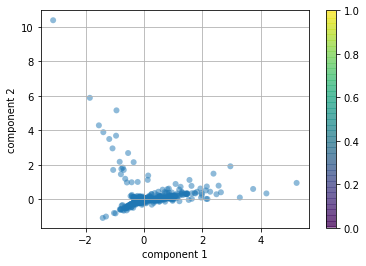

In [20]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [21]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
pca.explained_variance_ratio_.sum()

0.13244783421893835

In [22]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(count_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

125

In [16]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.354473,0.047620,0.047620
pca2,0.317390,0.042638,0.090258


In [17]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=6)

In [18]:
# 모델에 fitting 하기
kmeans.fit(df_pca)

KMeans(n_clusters=6)

In [19]:
y_kmeans = kmeans.predict(df_pca)
y_kmeans[0:10] # 군집화 된 결과

array([0, 1, 1, 3, 0, 0, 1, 1, 1, 1], dtype=int32)

In [20]:
# 군집의 중심
kmeans.cluster_centers_

array([[ 1.07707995e+00,  2.73497017e-01, -5.24572131e-01,
         2.96588538e-01, -8.58658417e-02, -1.21043206e-01,
         5.64396530e-03, -1.32085227e-01,  5.40310868e-02,
         8.12534560e-02, -9.39101234e-02, -5.81964637e-02,
        -4.64117517e-02,  7.03157519e-03,  2.43837436e-02,
        -2.81382634e-02,  1.76472501e-02,  2.02550470e-02,
         1.43244850e-02, -7.83635294e-03, -1.77088591e-02,
         2.16939221e-03,  1.65308946e-02,  2.13087463e-02,
        -9.79070423e-03,  3.58130398e-02,  1.68501413e-03,
         3.70492996e-02, -8.41098406e-03, -1.87594001e-02,
         4.27952210e-02, -1.41633796e-02,  1.61736908e-02,
         1.65297368e-02,  7.95721111e-03, -4.21312689e-02,
        -1.07227919e-02,  9.47738683e-03, -9.90129707e-03,
        -1.20043768e-02,  1.49766539e-02, -1.28743068e-02,
         4.30666129e-03, -1.66085798e-02,  1.01737702e-02,
        -1.58564184e-03,  8.79187170e-03, -1.20926056e-02,
         1.31598115e-03,  2.21146934e-03, -4.80945721e-0

In [21]:
kmeans.labels_[0:8]

array([0, 1, 1, 3, 0, 0, 1, 1], dtype=int32)

In [22]:
y_kmeans[:5]

array([0, 1, 1, 3, 0], dtype=int32)

In [23]:
# 클러스터링의 성능측정
# 값이 높을 수록 좋음
kmeans.inertia_

6072.76117538318

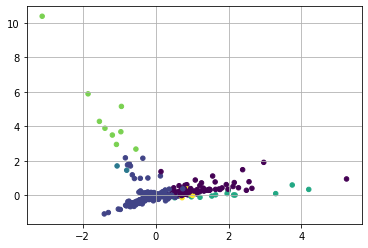

In [24]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [25]:
np.array(df_pca)

array([[ 0.94802089,  0.09930939, -0.31432594, ...,  0.10984545,
         0.01876198, -0.37362182],
       [-0.24145801, -0.11185492, -0.02446564, ...,  0.00473022,
        -0.00705196, -0.00334753],
       [-0.21139244, -0.11419206, -0.01053745, ...,  0.13105042,
        -0.21286482, -0.08838678],
       ...,
       [ 0.2147909 ,  0.02979509,  0.07540424, ..., -0.01025841,
        -0.02480028,  0.13609684],
       [-0.25924702, -0.13292089, -0.04161654, ...,  0.06609565,
         0.0255719 ,  0.04380388],
       [ 1.08918712,  0.88845614, -1.07455177, ..., -0.03342104,
        -0.02257015,  0.01373323]])

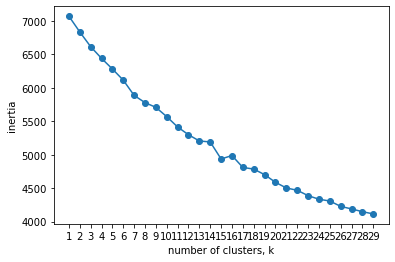

In [26]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [27]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

[(0,
  ['freeCodeCamp/freeCodeCamp',
   'vuejs/vue',
   'facebook/react',
   'flutter/flutter',
   '30-seconds/30-seconds-of-code',
   'justjavac/free-programming-books-zh_CN',
   'nodejs/node',
   'angular/angular',
   'ant-design/ant-design',
   'mrdoob/three.js',
   'mui-org/material-ui',
   'goldbergyoni/nodebestpractices',
   'PanJiaChen/vue-element-admin',
   'storybookjs/storybook',
   'webpack/webpack',
   'thedaviddias/Front-End-Checklist',
   'practical-tutorials/project-based-learning',
   'gatsbyjs/gatsby',
   'ElemeFE/element',
   'ionic-team/ionic-framework',
   'enaqx/awesome-react',
   'leonardomso/33-js-concepts',
   'meteor/meteor',
   'prettier/prettier',
   'nestjs/nest',
   'juliangarnier/anime',
   'parcel-bundler/parcel',
   'Dogfalo/materialize',
   'nwjs/nw.js',
   'TryGhost/Ghost',
   'nuxt/nuxt.js',
   'bailicangdu/vue2-elm',
   'vercel/hyper',
   'FreeCodeCampChina/freecodecamp.cn',
   'pixijs/pixijs',
   'dcloudio/uni-app',
   'vuetifyjs/vuetify',
   'yangs

In [28]:
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

In [29]:
# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

[[('javascript', 102),
  ('react', 95),
  ('web', 76),
  ('vue', 53),
  ('nodejs', 25),
  ('ui', 22),
  ('material', 22),
  ('typescript', 20),
  ('css', 16),
  ('angular', 14),
  ('html', 14),
  ('frontend', 12),
  ('hacktoberfest', 12),
  ('framework', 11),
  ('ios', 11)],
 [('python', 94),
  ('javascript', 74),
  ('awesome', 70),
  ('hacktoberfest', 62),
  ('data', 54),
  ('machinelearning', 52),
  ('sql', 49),
  ('deep-learning', 44),
  ('api', 44),
  ('go', 44),
  ('android', 44),
  ('nodejs', 40),
  ('java', 38),
  ('web', 38),
  ('css', 35)],
 [('docker', 18),
  ('awesome', 2),
  ('moby', 2),
  ('list', 1),
  ('tools', 1),
  ('container', 1),
  ('monitoring', 1),
  ('security', 1),
  ('ui', 1),
  ('portainer', 1),
  ('hacktoberfest', 1)],
 [('interview', 48),
  ('algorithm', 23),
  ('leetcode', 9),
  ('programming', 6),
  ('system', 6),
  ('javascript', 6),
  ('data', 5),
  ('awesome', 5),
  ('python', 4),
  ('web', 4),
  ('sort', 4),
  ('computer-science', 3),
  ('design', 3),


In [30]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[freeCodeCamp/freeCodeCamp, vuejs/vue, faceboo...",114,"[(javascript, 102), (react, 95), (web, 76), (v..."
1,1,"[996icu/996.ICU, EbookFoundation/free-programm...",857,"[(python, 94), (javascript, 74), (awesome, 70)..."
2,2,"[veggiemonk/awesome-docker, portainer/portainer]",2,"[(docker, 18), (awesome, 2), (moby, 2), (list,..."
3,3,"[jwasham/coding-interview-university, donnemar...",13,"[(interview, 48), (algorithm, 23), (leetcode, ..."
4,4,"[macrozheng/mall, ityouknow/spring-boot-exampl...",9,"[(spring, 45), (java, 5), (mybatis, 4), (docke..."
5,5,"[cypress-io/cypress, hoppscotch/hoppscotch, mo...",5,"[(test, 26), (nodejs, 4), (rest, 3), (api, 2),..."


In [31]:
df_cluster.to_excel("packages_CountVector_kmeans_clusters.xlsx",index=False)

# DBSCAN Clustering

In [32]:
# dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan = DBSCAN(eps = 0.5)
dbscan_cluster = dbscan.fit_predict(df_pca)
dbscan_cluster

array([-1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1,
       -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  1, -1,
       -1,  0, -1,  0, -1, -1, -1,  2,  0, -1, -1, -1,  0, -1, -1, -1,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1,
       -1, -1,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1

In [33]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic

[(-1,
  ['freeCodeCamp/freeCodeCamp',
   'EbookFoundation/free-programming-books',
   'jwasham/coding-interview-university',
   'vuejs/vue',
   'facebook/react',
   'kamranahmedse/developer-roadmap',
   'sindresorhus/awesome',
   'tensorflow/tensorflow',
   'public-apis/public-apis',
   'twbs/bootstrap',
   'getify/You-Dont-Know-JS',
   'donnemartin/system-design-primer',
   'CyC2018/CS-Notes',
   'ohmyzsh/ohmyzsh',
   'flutter/flutter',
   'github/gitignore',
   'microsoft/vscode',
   'trekhleb/javascript-algorithms',
   'TheAlgorithms/Python',
   'danistefanovic/build-your-own-x',
   'airbnb/javascript',
   'Snailclimb/JavaGuide',
   'vinta/awesome-python',
   'd3/d3',
   'electron/electron',
   'labuladong/fucking-algorithm',
   'ossu/computer-science',
   'jlevy/the-art-of-command-line',
   'facebook/create-react-app',
   'golang/go',
   'axios/axios',
   '30-seconds/30-seconds-of-code',
   'justjavac/free-programming-books-zh_CN',
   'nodejs/node',
   'kubernetes/kubernetes',
   '

In [34]:
df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num

In [35]:
topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('javascript', 174),
  ('react', 121),
  ('web', 120),
  ('python', 101),
  ('awesome', 83),
  ('nodejs', 71),
  ('hacktoberfest', 70),
  ('vue', 68),
  ('data', 66),
  ('interview', 63),
  ('spring', 61),
  ('sql', 55),
  ('machinelearning', 53),
  ('css', 52),
  ('android', 51)],
 [('protoc', 3),
  ('flutter', 3),
  ('hosts', 2),
  ('dotnet', 2),
  ('dotnet-core', 2),
  ('slideshow', 1),
  ('slides', 1),
  ('presentations', 1),
  ('jquery', 1),
  ('serialization', 1),
  ('protobuf', 1),
  ('marshalling', 1),
  ('rpc', 1),
  ('protobuf-runtime', 1),
  ('dubbo', 1)],
 [('hacktoberfest', 8),
  ('apollo', 1),
  ('nasa', 1),
  ('agc', 1),
  ('applications', 1),
  ('coding', 1),
  ('ideas', 1),
  ('dotnet', 1),
  ('aspnetcore', 1),
  ('productivity', 1),
  ('drawing', 1),
  ('collaboration', 1),
  ('whiteboard', 1),
  ('diagrams', 1),
  ('community', 1)],
 [('javascript', 10),
  ('jquery', 2),
  ('modules', 1),
  ('util', 1),
  ('lodash', 1),
  ('slideshow', 1),
  ('slide', 1),
  ('snap'

In [36]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[freeCodeCamp/freeCodeCamp, EbookFoundation/fr...",730,"[(javascript, 174), (react, 121), (web, 120), ..."
1,0,"[996icu/996.ICU, torvalds/linux, jackfrued/Pyt...",252,"[(protoc, 3), (flutter, 3), (hosts, 2), (dotne..."
2,1,"[chrislgarry/Apollo-11, florinpop17/app-ideas,...",8,"[(hacktoberfest, 8), (apollo, 1), (nasa, 1), (..."
3,2,"[lodash/lodash, alvarotrigo/fullPage.js, Leafl...",10,"[(javascript, 10), (jquery, 2), (modules, 1), ..."
